<a href="https://colab.research.google.com/github/ChathurangaChandrasekara/Motorbike_Detection/blob/Branch/YOLO_BikeDetection100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/veshitala/darkflow.git

Cloning into 'darkflow'...
remote: Enumerating objects: 2801, done.
remote: Total 2801 (delta 0), reused 0 (delta 0), pack-reused 2801
Receiving objects: 100% (2801/2801), 35.98 MiB | 41.35 MiB/s, done.
Resolving deltas: 100% (1806/1806), done.


In [2]:
ls

darkflow/  sample_data/


In [3]:
cd ./darkflow/

/content/darkflow


In [4]:
! python3 setup.py build_ext --inplace

Compiling darkflow/cython_utils/nms.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo2_findboxes.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo_findboxes.pyx because it changed.
[1/3] Cythonizing darkflow/cython_utils/cy_yolo2_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo2_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/3] Cythonizing darkflow/cython_utils/cy_yolo_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[3/3] Cythonizing darkflow/cython_utils/nms.pyx
/usr/

In [5]:
! pip install -e .

Obtaining file:///content/darkflow
  Running setup.py develop for darkflow


In [6]:
! pip install .

Processing /content/darkflow
  Created wheel for darkflow: filename=darkflow-1.0.0-cp36-cp36m-linux_x86_64.whl size=829280 sha256=671b591aa76d6011a826c88a68b4b49aaf9f799cc0693d945b624e4ae03b902d
  Stored in directory: /tmp/pip-ephem-wheel-cache-rr5p5y8w/wheels/2f/3a/c5/e84e79d73d5a73aa1b5129a66a40947d9d77a32ebed501e431
Successfully built darkflow
  Found existing installation: darkflow 1.0.0
    Can't uninstall 'darkflow'. No files were found to uninstall.


In [7]:
pip install tensorflow==1.13.2

     |████████████████████████████████| 92.6MB 95kB/s 
     |████████████████████████████████| 368kB 56.1MB/s 
     |████████████████████████████████| 3.2MB 59.3MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [10]:
ls

Asset   ckpt/               demo.gif    LICENSE      sample_img/  YOLO.ipynb
build/  darkflow/           flow*       preview.png  setup.py
cfg/    darkflow.egg-info/  labels.txt  README.md    test/


In [0]:
options = {"model": "./cfg/yolov2-voc-1c.cfg", 
           "load": "../gdrive/My Drive/YOLO100/yolov2-voc.weights",
           "batch": 16,
           "epoch": 100,
           "gpu": 1.0,
           "train": True,
           "annotation": "../gdrive/My Drive/YOLO100/annotations/",
           "dataset": "../gdrive/My Drive/YOLO100/images/"}

In [12]:
tfnet = TFNet(options)

Parsing ./cfg/yolov2-voc.cfg
Parsing ./cfg/yolov2-voc-1c.cfg
Loading ../gdrive/My Drive/YOLO100/yolov2-voc.weights ...
Successfully identified 202704264 bytes
Finished in 0.8173696994781494s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  |

In [13]:
tfnet.train()


./cfg/yolov2-voc-1c.cfg parsing ../gdrive/My Drive/YOLO100/annotations/
Parsing for ['Bike'] 

./cfg/yolov2-voc-1c.cfg parsing ../gdrive/My Drive/YOLO100/annotations/
Parsing for ['Bike'] 

./cfg/yolov2-voc-1c.cfg parsing ../gdrive/My Drive/YOLO100/annotations/
Parsing for ['Bike'] 

./cfg/yolov2-voc-1c.cfg parsing ../gdrive/My Drive/YOLO100/annotations/
Parsing for ['Bike'] 
[====================>]100%  16.xml
Statistics:
Bike: 100
Dataset size: 100
Dataset of 100 instance(s)

Statistics:
Bike: 100
Dataset size: 100
Dataset of 100 instance(s)

Statistics:
Bike: 100
Dataset size: 100
Dataset of 100 instance(s)

Statistics:
Bike: 100
Dataset size: 100
Dataset of 100 instance(s)
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 16
	Epoch number  : 100
	Backup every  : 2000
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 16
	Epoch number  : 100
	Backup every  : 2000
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 16
	Epoch number  : 100
	Backup eve

In [0]:
tfnet.savepb()

**TESTING**

---



In [0]:
options = {"model": "cfg/yolov2-voc-1c.cfg",
           #"load": 5500,
           "gpu": 1.0,
          "threshold":0.01,
          "pbLoad":"/content/darkflow/built_graph/yolov2-voc-1c.pb" ,
          "metaLoad":"/content/darkflow/built_graph/yolov2-voc-1c.meta"}

In [19]:
import os
cwd = os.getcwd()
print(cwd)

/content/darkflow


In [23]:
tfnet2 = TFNet(options)


Loading from .pb and .meta
GPU mode with 1.0 usage


In [62]:
import pprint as pp

original_img = cv2.imread("/content/gdrive/My Drive/YOLO/yolo_dataset/test_images/1055.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(original_img)
print(results)

[{'label': 'Bike', 'confidence': 0.017597653, 'topleft': {'x': 0, 'y': 0}, 'bottomright': {'x': 15, 'y': 20}}, {'label': 'Bike', 'confidence': 0.026125478, 'topleft': {'x': 14, 'y': 0}, 'bottomright': {'x': 32, 'y': 17}}, {'label': 'Bike', 'confidence': 0.035161335, 'topleft': {'x': 30, 'y': 0}, 'bottomright': {'x': 49, 'y': 20}}, {'label': 'Bike', 'confidence': 0.037908293, 'topleft': {'x': 46, 'y': 0}, 'bottomright': {'x': 65, 'y': 19}}, {'label': 'Bike', 'confidence': 0.047748, 'topleft': {'x': 7, 'y': 0}, 'bottomright': {'x': 105, 'y': 61}}, {'label': 'Bike', 'confidence': 0.04361316, 'topleft': {'x': 0, 'y': 0}, 'bottomright': {'x': 164, 'y': 93}}, {'label': 'Bike', 'confidence': 0.03345793, 'topleft': {'x': 62, 'y': 0}, 'bottomright': {'x': 82, 'y': 19}}, {'label': 'Bike', 'confidence': 0.034959823, 'topleft': {'x': 78, 'y': 0}, 'bottomright': {'x': 98, 'y': 20}}, {'label': 'Bike', 'confidence': 0.03523602, 'topleft': {'x': 95, 'y': 0}, 'bottomright': {'x': 114, 'y': 20}}, {'labe

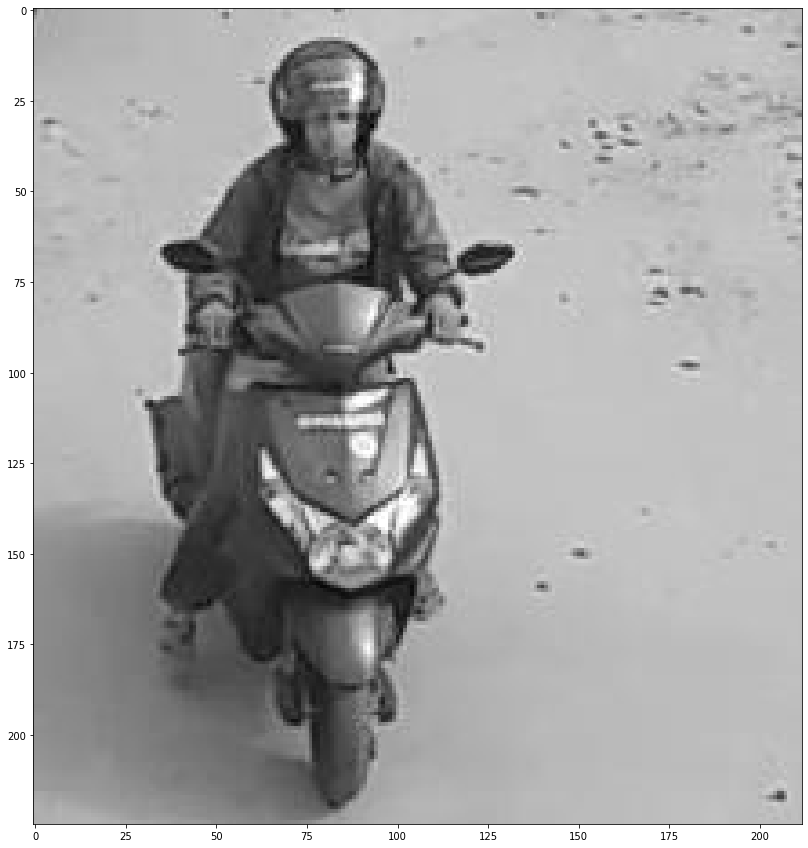

In [63]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [0]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.2:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

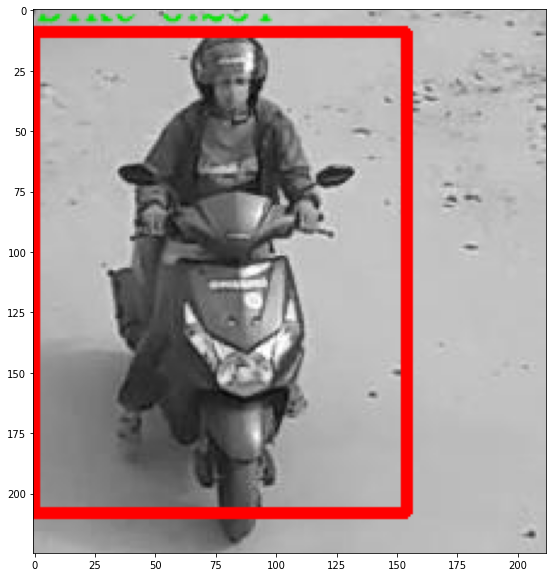

In [65]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))